In [1]:
import json, os, math, sys, re, random
import numpy as np
from collections import defaultdict, Counter
from tqdm import tqdm, trange
from pprint import pprint
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd

In [24]:
task = "raspL"

In [32]:
num_val = 300
num_train = 1000000
max_positional_embedding = 256

In [54]:
data = []
num_data = num_val + num_train
start_points, end_points = [], []
seen_lengths = []
seq = []
while len(data) < num_data:
    a, b = sorted(random.sample(range(0, 156), 2))
    if b-a+1 > 50: continue
    seq.extend(['<sos>', str(a), str(b), '<'] + [str(i) for i in range(a, b+1)] + ['<eos>'])
    start_points.append(a)
    end_points.append(b)
    seen_lengths.append(b-a+1)
    if len(seq) > max_positional_embedding:
        seq = seq[:max_positional_embedding]
        data.append([seq[:-1], seq[1:]])
        seq = []

train_data = data[:num_train]
val_data = data[num_train:]


In [55]:
# Verify vocab
print(sorted(list(set([w for x in train_data for w in x[0]] + [w for x in train_data for w in x[1]]))))

['0', '1', '10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '<', '<eos>', '<s

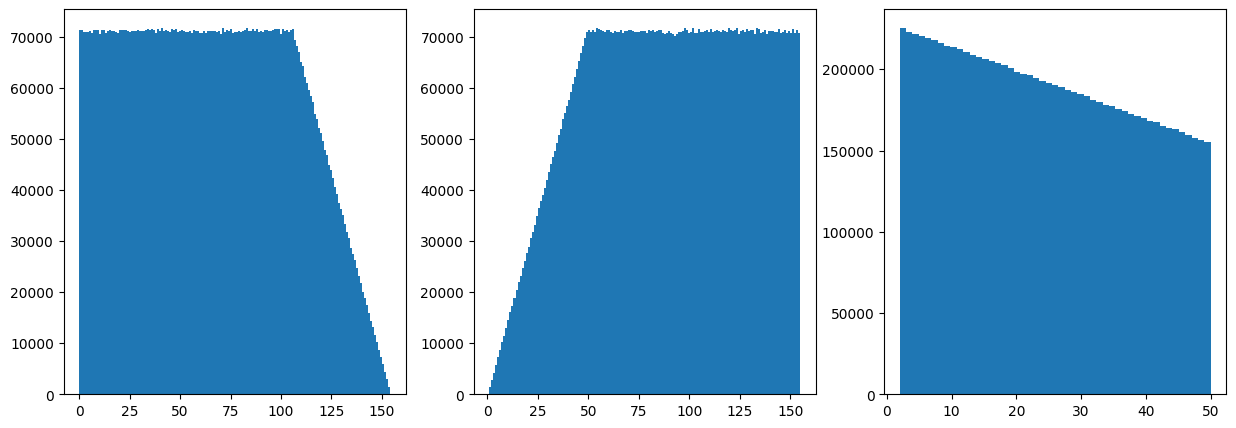

In [56]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131)
ax.hist(start_points, bins=len(Counter(start_points)))
ax = fig.add_subplot(132)
ax.hist(end_points, bins=len(Counter(end_points)))
ax = fig.add_subplot(133)
ax.hist(seen_lengths, bins=len(Counter(seen_lengths)))

plt.show()

In [57]:
Counter([len(x[0]) for x in train_data])

Counter({255: 1000000})

In [58]:
task

'raspL'

In [59]:
with open(f"../data/rasp_primitives/counting_{task}/train.txt", "w") as f:
    for x in train_data:
        f.write(json.dumps(x) + "\n")
with open(f"../data/rasp_primitives/counting_{task}/val.txt", "w") as f:
    for x in val_data:
        f.write(json.dumps(x) + "\n")

In [60]:
ood_data = []
start_points, end_points = [], []
seen_lengths = []
seq = []
for a in range(1, 155):
    for b in range(a+1, 156):
        if b-a+1 <= 50: continue
        seq = ['<sos>', str(a), str(b), '<'] + [str(i) for i in range(a, b+1)] + ['<eos>']
        ood_data.append([seq[:-1], seq[1:]])
        start_points.append(a)
        end_points.append(b)
        seen_lengths.append(b-a+1)
print(len(ood_data))

5565


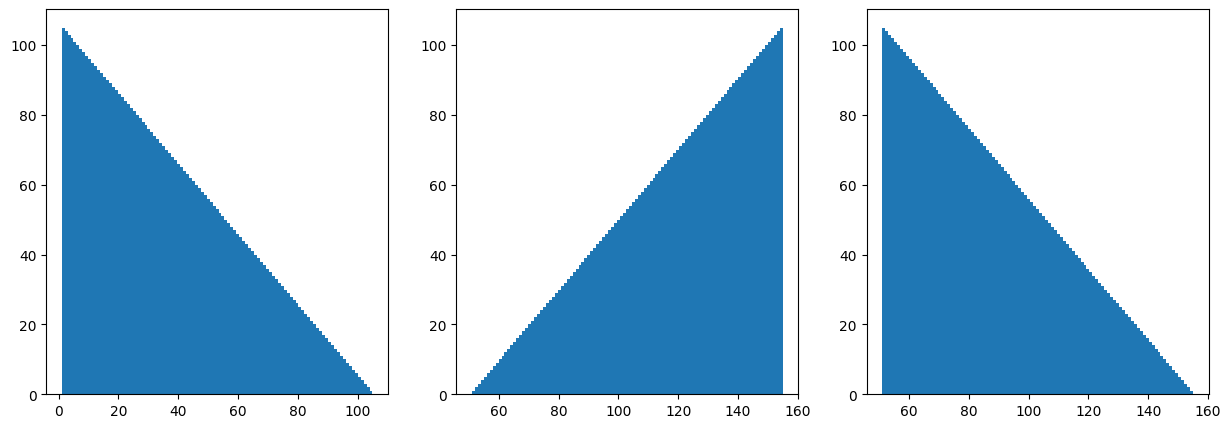

In [61]:
fig = plt.figure(figsize=(15, 5))

ax = fig.add_subplot(131)
ax.hist(start_points, bins=len(Counter(start_points)))
ax = fig.add_subplot(132)
ax.hist(end_points, bins=len(Counter(end_points)))
ax = fig.add_subplot(133)
ax.hist(seen_lengths, bins=len(Counter(seen_lengths)))

plt.show()

In [62]:
with open(f"../data/rasp_primitives/counting_{task}/ood_test.txt", "w") as f:
    for x in ood_data:
        f.write(json.dumps(x) + "\n")